In [86]:
from methods import LMEO
from pprint import pprint
lm = LMEO()

In [87]:
import pickle
with open(file=r"./pickles/multi_prompt_data_43.pkl", mode='rb') as file:
    multi_city_results = pickle.load(file)

In [88]:
Exeter_words =  [['Abode', 'ABode']] + 'Vin Mercure Holiday Queens Gate Devon Magdalen South Globe Rougemont Buckerel'.split()
Bristol_words =  ['Marriott','Gainsborough','Hilton','Mercure', 'arbour' ,'Radisson', 'Avon', 'DoubleTree', 'Berkeley', 'ibis', 'Future','ztec', 'gabel', ]
London_words = 'Savoy Langham Ritz Clarid hangri Dorchest Shard Rose Royal'.split()
Manchester_words = 'Gotham rincipal idland adisson ilton'.split() + ['Meli', 'inn', 'INN', 'Inn']
Newcastle_words = 'Crowne Vin County Dene Sandman Indigo Hilton Jury'.split()
Brighton_words = 'Drake Vin Jurys Artist Queens Grand TheBrighton'.split()
Birmingham_words = 'ACHotel adisson almaison BirminghamCityCentre Vin Cube dgbaston Grand Staying Indigo Hampton'.split()
Leeds_words = 'Dakota DoubleTree Malmaison Marrio Quebecs Radisson Queen Thorpe Park bisSt Cosmo'.split()
Liverpool_words = 'Double HopeS James Pullman Liner Titanic Indigo Richmond Malmaison'.split()

In [89]:
# zipping together the cities and the words.
cities = [Exeter_words, Bristol_words, London_words, Manchester_words, Newcastle_words, Brighton_words, Birmingham_words, Leeds_words, Liverpool_words]
city_names = ['Exeter', 'Bristol', 'London', 'Manchester', 'Newcastle', 'Brighton', 'Birmingham', 'Leeds', 'Liverpool']
zipped = list(zip(city_names, cities))

In [90]:
condition = lambda rank: 'Mercure' in rank[0] 

In [91]:
a, b = lm.create_split_dict(multi_city_results['Exeter'][0], Exeter_words, condition)

In [92]:
pprint(b)

{0: {'Devon': 0.21052631578947367,
     'Globe': 0.017543859649122806,
     'Holiday': 0.017543859649122806,
     'JurysInnExeter': 0.03508771929824561,
     'Magdalen': 0.3157894736842105,
     'Queens': 0.017543859649122806,
     'South': 0.017543859649122806,
     'TheDeanCourtHotel': 0.017543859649122806,
     'TheOldVicarage': 0.017543859649122806,
     'TheSalutation': 0.017543859649122806,
     'Vin': 0.3157894736842105},
 1: {'Abode': 0.017543859649122806,
     'Devon': 0.10526315789473684,
     'ExeterCourtHotel': 0.017543859649122806,
     'JurysInnExeter': 0.03508771929824561,
     'Magdalen': 0.14035087719298245,
     'Mercure': 0.56140350877193,
     'South': 0.10526315789473684,
     'Vin': 0.017543859649122806},
 2: {'Abode': 0.03508771929824561,
     'Devon': 0.10526315789473684,
     'Gate': 0.017543859649122806,
     'Globe': 0.017543859649122806,
     'HamptonbyHiltonExeterAirport': 0.017543859649122806,
     'Holiday': 0.03508771929824561,
     'JurysInnExeter': 0.1

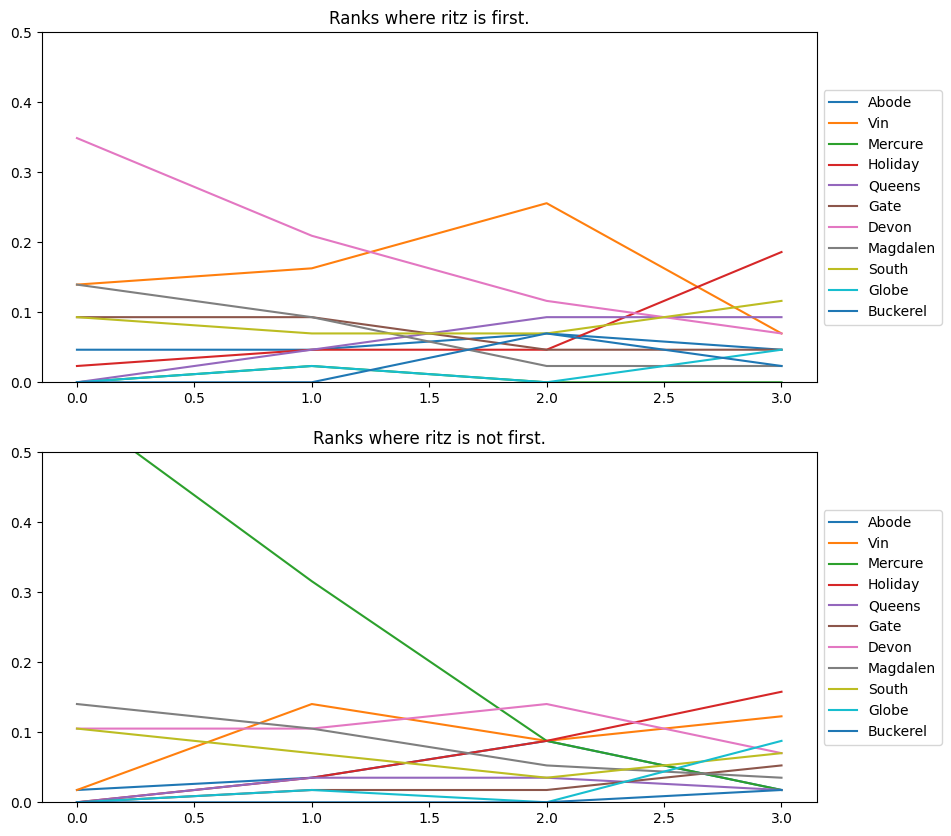

In [93]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the data on the second axis
for hotel_id in Exeter_words:
    hotel_id_key = hotel_id[0] if isinstance(hotel_id, list) else hotel_id

    amount_in_place_a = [place.get(hotel_id_key, 0) for _, place in list(a.items())[1:]]
    amount_in_place_b = [place.get(hotel_id_key, 0) for _, place in list(b.items())[1:]]

    if sum(amount_in_place_a) != 0:
        ax1.plot(amount_in_place_a, label=hotel_id_key)
    if sum(amount_in_place_b) != 0:
        ax2.plot(amount_in_place_b, label=hotel_id_key)

# Set the title of the plot

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_title('Ranks where ritz is first.')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_title('Ranks where ritz is not first.')

ax2.set_ylim(0, 0.5)
ax1.set_ylim(0, 0.5)

# Show the plot
plt.show()

You cannot interpret this you need an acctual statistical test. 

Possible tests:
- Test how correlated the frequencies of different hotels are after a certain point. 
- Take out the first two and then use the other rankings and look at their similarity.


Other things which you could test. 
- You could split by the cases that one ranks higher than another gneraly. 
- However you do need a more robust test in general.


## New experiment design create a filter based of of a first and second choice and then do a hypothesis test to compare the following part of the distribution further. 

Create:
- Way to filter by a first and second choice. 
- Then determine the hypothesis test that you will need - this is the harder part so do it now. 
    - Specific test seems to compicated. 
    - Use a chi-square goodness of fit test with a large sample of both. Hence simply estimate the prob in each position by the freq
    - Is this circula, because you would assume that 

In [94]:
# Filtering out the first and second choice. 

def filter_by_two(first_hotel_id, second_hotel_id, all_ranks):
    
    def create_condition(hotel_id_obj, place):
        if isinstance(hotel_id_obj, list):
            return lambda rank: any([hotel_id in rank[place] for hotel_id in hotel_id_obj])
        else:
            return lambda rank: hotel_id_obj in rank[place]
    
    first_in_zero = create_condition(first_hotel_id, 0)
    second_in_one = create_condition(second_hotel_id, 1)
    
    second_in_zero = create_condition(second_hotel_id, 0)
    first_in_one = create_condition(first_hotel_id, 1)
    
    first_perm_list = []
    second_perm_list = []
    neither_perm_list = []

    for rank in all_ranks:
        # This logic could be better but I dont really care.
        if first_in_zero(rank) and second_in_one(rank):
            first_perm_list.append(rank)
        elif second_in_zero(rank) and first_in_one(rank):
            second_perm_list.append(rank)
        else:
            neither_perm_list.append(rank)

    return first_perm_list, second_perm_list, neither_perm_list

    

Splitting the dict by the two hotels.

Floors:
- The other method is biased twoards those in the target words although this isnt that large of an issue.

In [95]:
# lets get a much bigger dataset. I think it will still be free.
prompt = 'Recommend five hotels in London, UK. \n State the name of the hotel on a new line each time not using a numbered list.'
# Turns out you cannot order more than 128 at a time.
big_data = lm.order_set(prompt, 'Bristol1001', 3001)

Loading Previously Generated Ranks.


In [96]:
pprint(len(big_data))

2958


In [97]:
import numpy as np


ritz_first, savoy_first, _ = filter_by_two('Ritz', 'Savoy', big_data)
print(len(ritz_first), len(savoy_first))
ritz_first = np.column_stack(ritz_first)
savoy_first = np.column_stack(savoy_first)


ritz_dict = lm.create_percent_dict(ritz_first, London_words, 0)
savoy_dict = lm.create_percent_dict(savoy_first, London_words, 1)

849 174


In [98]:
pprint(big_data[2000])

['TheRitzLondon',
 'Shangri-LaHotelatTheShard',
 'TheLanghamLondon',
 'HamYardHotel',
 'TheSohoHotel']


Printing the corresponding percentages.

In [99]:
for i in range(2, 5):
    print("Ritz Dict:", sum(ritz_dict[i].values()))
    pprint(ritz_dict[i])
    print("Savoy Dict:", sum(savoy_dict[i].values()))
    pprint(savoy_dict[i])
    print()

Ritz Dict: 1.000000000000002
{"Brown'sHotel": 0.0035335689045936395,
 'Clarid': 0.31213191990577255,
 'ConradLondonStJames': 0.001177856301531213,
 'CorinthiaHotelLondon': 0.008244994110718492,
 'Dorchest': 0.16961130742049477,
 'HamYardHotel': 0.0035335689045936395,
 'Hotel': 0.012956419316843343,
 'InterContinentalLondonParkLane': 0.001177856301531213,
 'Langham': 0.29093050647821056,
 'MandarinOrientalHydePark': 0.02355712603062427,
 'Rose': 0.010600706713780918,
 'Royal': 0.008244994110718492,
 'Shard': 0.005889281507656065,
 'TheConnaught': 0.014134275618374556,
 'TheCorinthiaHotel': 0.001177856301531213,
 'TheCorinthiaHotelLondon': 0.002355712603062426,
 'TheGoring': 0.001177856301531213,
 'TheMayFairARadissonCollectionHotel': 0.002355712603062426,
 'TheNed': 0.0341578327444052,
 'TheNedLondon': 0.001177856301531213,
 'hangri': 0.09187279151943455}
Savoy Dict: 0.9999999999999992
{'Clarid': 0.24137931034482737,
 'Dorchest': 0.16666666666666655,
 'Langham': 0.40804597701149387,
 'O

In [100]:
for i in range(5):
    mean = np.mean([abs(value - savoy_dict[i].get(key, 0)) for key, value in ritz_dict[i].items()])
    print(i, mean)

0 1.0000000000000058
1 1.0000000000000058
2 0.01606642413270902
3 0.009713659071524402
4 0.011452824824336875


We now need an automatic chi-square test. 

- research the method. 

Method:
- Choose in what position we want to test.
- Get all the keys together, we will need to make sure the data is of the same length. 



Bringing Everything Together:

In [101]:
London_words = 'Savoy Langham Ritz Clarid hangri Dorchest Shard Rose Royal Ned Corin Mandarin'.split()

In [102]:
import itertools
word_pair_combinations = list(itertools.combinations(London_words, 2))

for word1, word2 in word_pair_combinations:
    first, second, neither = filter_by_two(word1, word2, big_data)
    
    if len(first) <= 20 or len(second) <= 20:
        continue
    print(word1, word2, len(first), len(second))
    
    first = np.column_stack(first)
    second = np.column_stack(second)
    first_dict = lm.create_percent_dict(first, London_words, 1)
    second_dict = lm.create_percent_dict(second, London_words, 1)
    
    i =2
    mean = np.mean([abs(value - second_dict[i].get(key, 0)) for key, value in first_dict[i].items()])
    print(i, mean, word1, word2)

Savoy Langham 21 39
2 0.10927960927960927 Savoy Langham
Savoy Ritz 174 849
2 0.024669997156898594 Savoy Ritz
Langham Ritz 75 769
2 0.024922410056350056 Langham Ritz
Langham Dorchest 34 30
2 0.08963585434173668 Langham Dorchest
Ritz Dorchest 405 48
2 0.05578002244668905 Ritz Dorchest


On the most popular choices the difference in the frequency of the next choice is minimal. 

- This is a characteristic of a good ranking. 

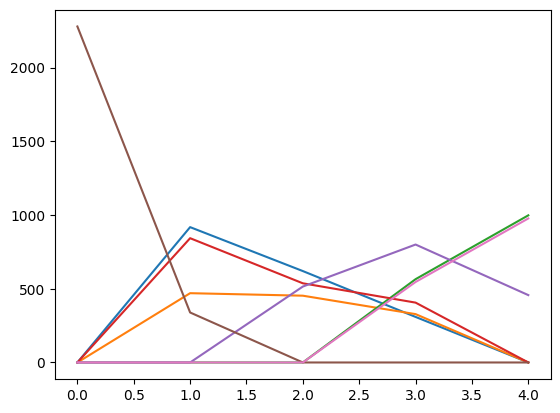

In [103]:
from methods import Static

Static.plot_from_ranks(big_data, London_words, 300)

In [110]:
big_data = lm.order_set(prompt, 'Bristol1001', 3001)
print(big_data[0])
total_dict = lm.create_percent_dict(np.column_stack(big_data), London_words, 1)

Loading Previously Generated Ranks.
['TheRitzLondon', 'TheSavoy', 'TheDorchester', "Claridge's", 'TheLanghamLondon']


In [111]:
pprint(total_dict)

{0: {'Corin': 0.0016903313049357674,
     'Dorchest': 0.03177822853279243,
     'Langham': 0.07200811359026349,
     'Mandarin': 0.005070993914807302,
     'Ned': 0.015212981744421906,
     'Other': 0.018931710615280595,
     'Ritz': 0.7704530087897526,
     'Savoy': 0.08350236646382647,
     'hangri': 0.001352265043948614},
 1: {'Clarid': 0.014198782961460446,
     'Corin': 0.002704530087897228,
     'Dorchest': 0.15889114266396015,
     'Langham': 0.2849898580121658,
     'Mandarin': 0.005070993914807302,
     'Ned': 0.041244083840432724,
     'Other': 0.04935767410412441,
     'Ritz': 0.11460446247464395,
     'Rose': 0.0023664638269100743,
     'Royal': 0.0003380662609871535,
     'Savoy': 0.3103448275862018,
     'Shard': 0.008451656524678837,
     'hangri': 0.0074374577417173765},
 2: {'Clarid': 0.17410412440838174,
     'Corin': 0.009465855307640297,
     'Dorchest': 0.15314401622717866,
     'Langham': 0.18154158215009897,
     'Mandarin': 0.022988505747126436,
     'Ned': 0.03